感知机模型验证，
自己生成数据点生成数据标签，然后再使用感知机对偶迭代公式迭代

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

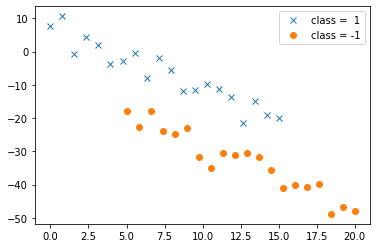

In [2]:
# 使用两条直线生成两类数据
X1 = np.linspace(0, 15, 20)
X2 = np.linspace(5, 20, 20)

Y1 = - 2 * X1 + 8 + np.random.normal(scale= 3, size=X1.shape)
Y2 = - 2 * X2 - 8 + np.random.normal(scale= 3, size=X2.shape)

plt.plot(X1, Y1, 'x', label='class =  1')
plt.plot(X2, Y2, 'o', label='class = -1')
# 给图像添加图例
plt.legend()

In [3]:
# 将上图的两类点拼接为一个集合，然后将点的坐标与标记划分为两部分 ： x_train, y_train
class1 = pd.DataFrame([X1, Y1, np.ones(X1.shape)]).T
class2 = pd.DataFrame([X2, Y2, np.ones(X1.shape)*-1]).T
data = np.array(pd.concat([class1, class2]))
x_train, y_train  = data[:, :-1], data[:, -1]

In [9]:
class Perceptron:
    # 构造函数
    def __init__(self):
        self.alpha = 0.05
        self.paras = []
    
    # 超平面函数
    def f_x(self, x):
        return np.dot(self.W , x) + self.b
    
    def fit(self, X, Y):
        # 初始化参数 W 、b
        self.W = np.ones(X.shape[1], dtype=np.float32)
        self.b = 0
        print('w = ', self.W,'\nb = ', self.b)
        
        
        finish = False
        count = 0
        while not finish:
            count = count + 1
            finish = True
            for index in range(len(X)):
                x = X[index]
                y = Y[index]
                if y * self.f_x(x) <= 0:
                    self.W = self.W + self.alpha * y * x
                    self.b = self.b + self.alpha * y
                    finish = False
                    
                    self.paras.append((self.W, self.b))
            
            if finish:
                print('\n count = ', count)
                return 'Perceptron training completed!'
        

In [10]:
# 实例化模型，添加训练点进行训练
model = Perceptron()
model.fit(x_train, y_train)

w =  [1. 1.] 
b =  0

 count =  2


'Perceptron training completed!'

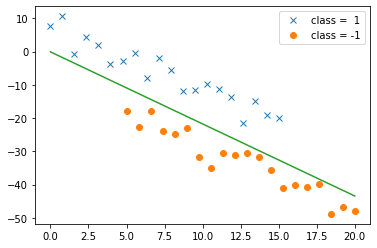

In [6]:
# 绘制原始的两类数据
plt.plot(X1, Y1, 'x', label='class =  1')
plt.plot(X2, Y2, 'o', label='class = -1')

# 绘制超平面
x_points = np.linspace(0, 20, 10)
y_points = -(model.W[0] * x_points + model.b) / model.W[1]
plt.plot(x_points, y_points)
# 给图像添加图例
plt.legend()